# Visualize cross section from the predicted results

In [1]:
import os
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import seaborn as sns
import scipy.interpolate
import PyQt5
%matplotlib inline
import seaborn as sns 

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Global variables

In [2]:
assign_num_list = {
                    'topsoil layer': 7,
                    'reclaimed layer': 6,
                    'sedimentary layer': 5,
                    'weathered soil': 4,
                    'weathered rock': 3,
                    'soft rock': 2,
                    'moderate rock': 1,
                     'hard rock': 0,
                  }


labels = {}
for k, v in assign_num_list.items():
    labels[v] = k

# Update color
label_colours = ['navy', 'mediumvioletred', 'olivedrab', 'gold',
                'darkorange', 'deepskyblue', 'moccasin','moccasin']

In [3]:
labels

{7: 'topsoil layer',
 6: 'reclaimed layer',
 5: 'sedimentary layer',
 4: 'weathered soil',
 3: 'weathered rock',
 2: 'soft rock',
 1: 'moderate rock',
 0: 'hard rock'}

### Load data .csv

### Extract cross section function

### Plot functions

In [4]:
def plot_full_3D_points(x, y, labels, colours, train_on = 'ntb'):
    sns.set_theme()
    sns.set_style("ticks")
    fig = plt.figure(figsize=(25, 15))
    
    ax = fig.add_subplot(121, projection='3d')
    ax.pbaspect = [2.0, 0.6, 0.25]
    
    plt.gca().invert_xaxis()
    
    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c], s = 25)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
        ax.view_init(45, 0) 
        
    ax = fig.add_subplot(122, projection='3d')
    ax.pbaspect = [2.0, 0.6, 0.25]
    plt.gca().invert_xaxis()
    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
        ax.view_init(90, 0) 
        if train_on == 'ntb':
            ax.set_title('3D Predicted Points Grid Train on NTB')

        elif train_on == 'ntb-tb':
            ax.set_title('3D Predicted Points Grid Train on merged NTB and TB')
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
        

In [5]:
def visualize_2_d(X, Y, labels = labels, colours=label_colours, train_on = 'ntb', cross = 'length', x_cross = 1):
    sns.set_theme()
    sns.set_style("ticks")
    x = X
    z = Y
    # Create plot
    if cross == 'length':
        fig = plt.figure(figsize = (18,4))
    elif cross == 'width':
        fig = plt.figure(figsize = (7,5))
        
    ax = fig.add_subplot(1, 1, 1)
    for c in np.unique(z):
        inx = np.where(z == c)
        if cross == 'length':
            ax.scatter(x[inx, 0], x[inx, 2], label=labels[c], c=colours[c])
            ax.set_xlabel('X')
        elif cross == 'width':
            ax.scatter(x[inx, 1], x[inx, 2], label=labels[c], c=colours[c], s =130)
            ax.set_xlabel('Y')
        ax.set_ylabel('Elevation')
    if train_on == 'ntb' and cross == 'length': 
        plt.title('Train on NTB - Cross-sectional view - From (X=549,659, Y=213,770) to (X=551,058, Y=213,843)')
    elif train_on == 'ntb-tb' and cross == 'length':
        plt.title('Train on NTB-TB - Cross-sectional view - From (X=549,659, Y=213,770) to (X=551,058, Y=213,843)')
    elif train_on == 'ntb' and cross == 'width': 
        plt.title('Train on NTB - Cross sectional view at X = {}'.format(x_cross))
    elif train_on == 'ntb-tb' and cross == 'width': 
        plt.title('Train on NTB-TB - Cross sectional view at X = {}'.format(x_cross))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
      fancybox=True, shadow=True, ncol=4)

# **Visualize results from model train on NTB**

In [35]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/output_results/export_dataframe_train_on_ntb.csv'
data = pd.read_csv(DATA_DIR)

In [36]:
def extract_cross_section(data = data, inquiry_X = False, inquiry_Y= False, inquiry_elevation = False):
    if inquiry_X:
        print('Process X')
        temp_df = data.loc[data['X'] == inquiry_X]
    elif inquiry_Y:
        print('Process Y')
        temp_df = data.loc[data['Y'] == inquiry_Y]
    elif inquiry_elevation:
        temp_df = data.loc[data['Elevation'] == inquiry_elevation]
    else: 
        temp_df = data

    X = temp_df[['X','Y','Elevation']].to_numpy()
    soil_type = temp_df['Target'].to_numpy()
    return X, soil_type

In [37]:
X, soil_type = extract_cross_section(data = data, inquiry_X = False, inquiry_Y= False, inquiry_elevation = False)

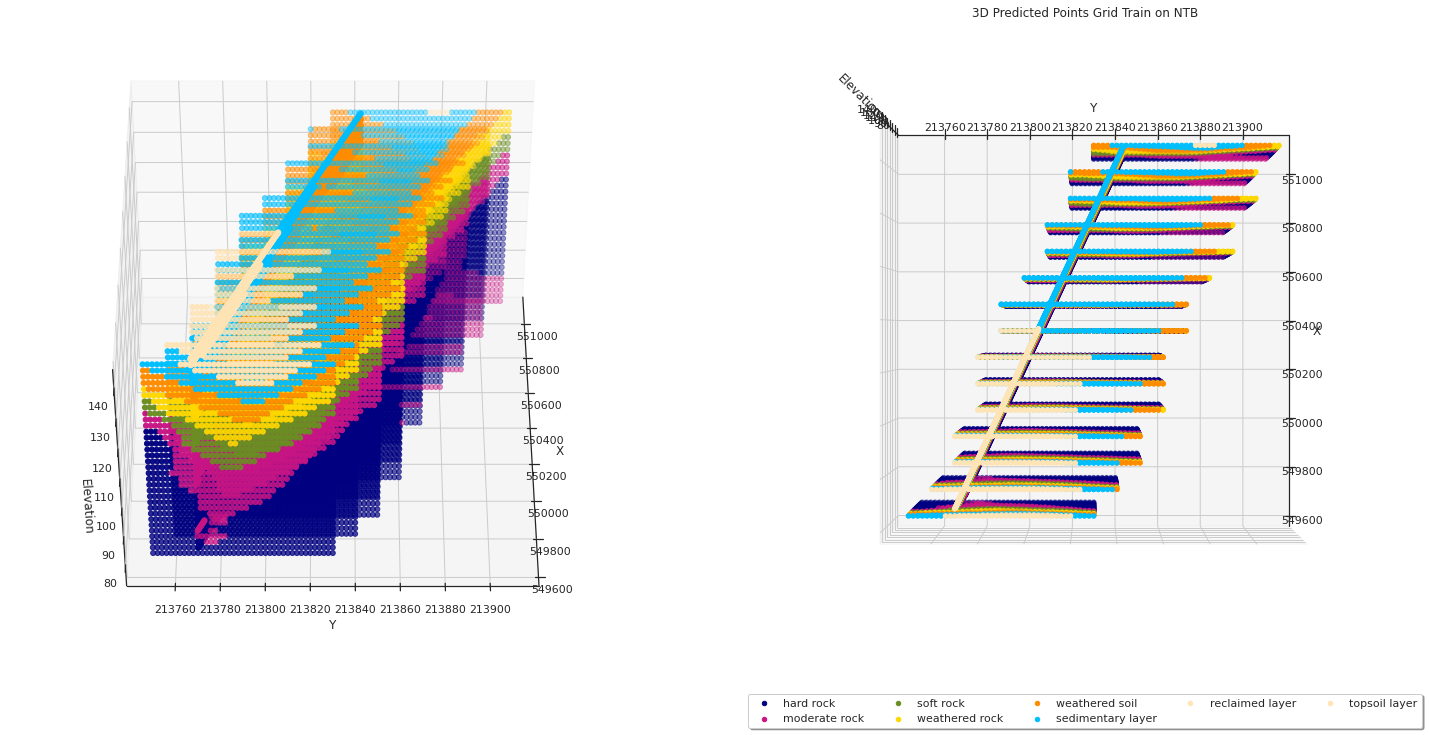

In [38]:
plot_full_3D_points(x = X[:42932], y = soil_type[:42932], labels = labels, colours=label_colours, train_on='ntb')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/3d_points_grid_train_on_NTB.png', dpi=300)

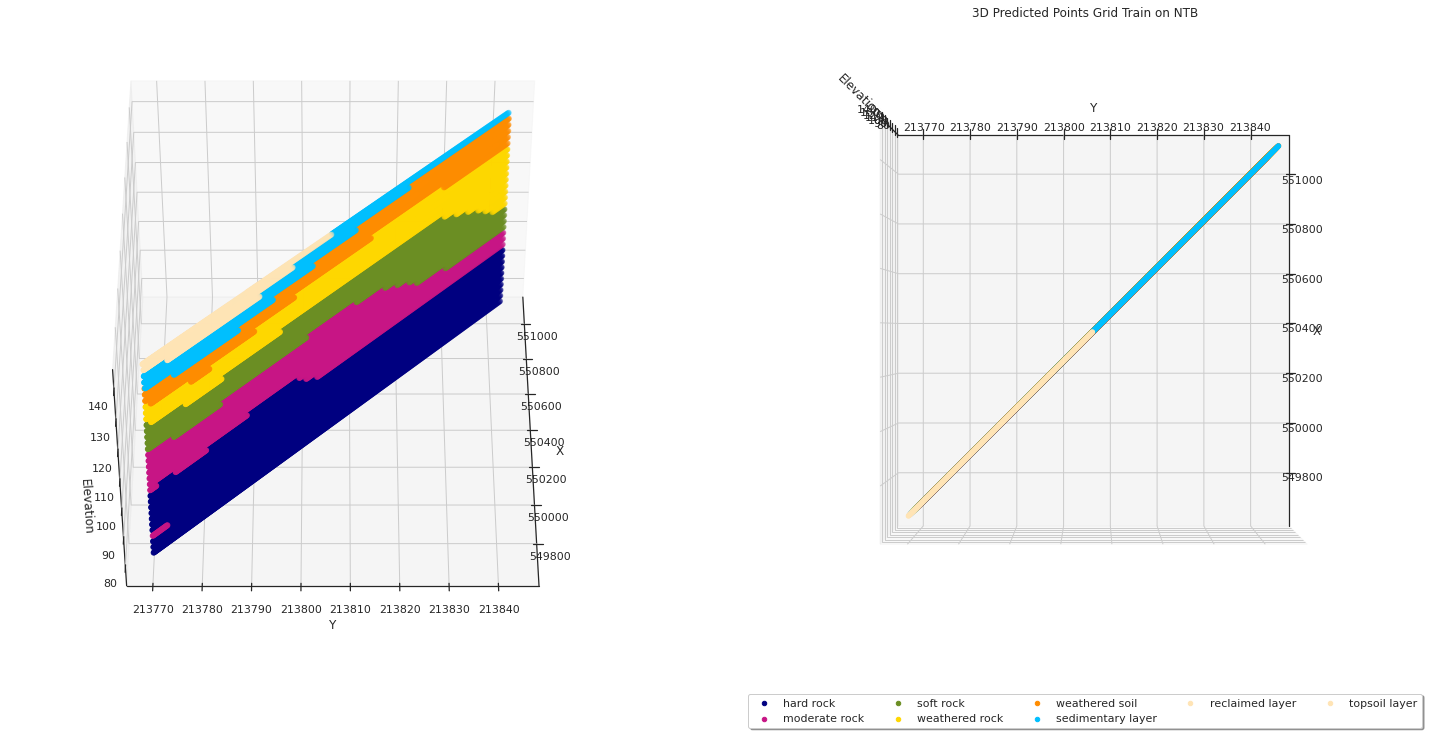

In [39]:
plot_full_3D_points(x = X[20327:42932], y = soil_type[20327:42932], labels = labels, colours=label_colours, train_on='ntb')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_sectional_long_train_onNTB.png', dpi=300)

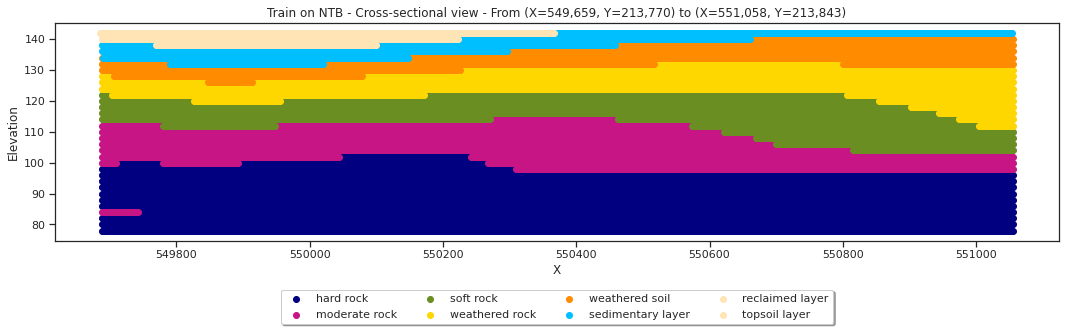

In [11]:
visualize_2_d(X = X[20327:42932], Y = soil_type[20327:42932], labels = labels, colours=label_colours, train_on = 'ntb', cross = 'length')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_sectional_long_train_onNTB_2D.png', dpi=300)

In [12]:
x_width = [549659,549759,549859,549959,550059,550158,550258,550358,550458,550558,550658,550758,550858,550958,551058]
y_width_start = [213750,213760,213770,213770,213780,213780,213780,213790,213790,213800,213810,213810,213820,213820,213830]
y_width_stop = [213830,213840,213850,213850,213860,213860,213860,213870,213870,213880,213890,213890,213900,213900,213910]

In [13]:
filter_data = data.loc[:20327]

In [14]:
filter_data

,X,Y,Elevation,Target
0,549659.0,213750.0,78.0,0
1,549659.0,213750.0,80.0,0
2,549659.0,213750.0,82.0,0
3,549659.0,213750.0,84.0,0
4,549659.0,213750.0,86.0,0
...,...,...,...,...
20323,549686.0,213770.0,134.0,4
20324,549686.0,213770.0,136.0,5
20325,549686.0,213770.0,138.0,5
20326,549686.0,213770.0,140.0,6


In [15]:
temp_df = filter_data[filter_data['X'] == x_width[14]]

In [16]:
temp_df

,X,Y,Elevation,Target
18942,551058.0,213830.0,78.0,0
18943,551058.0,213830.0,80.0,0
18944,551058.0,213830.0,82.0,0
18945,551058.0,213830.0,84.0,0
18946,551058.0,213830.0,86.0,0
...,...,...,...,...
20290,551058.0,213910.0,134.0,2
20291,551058.0,213910.0,136.0,3
20292,551058.0,213910.0,138.0,3
20293,551058.0,213910.0,140.0,3


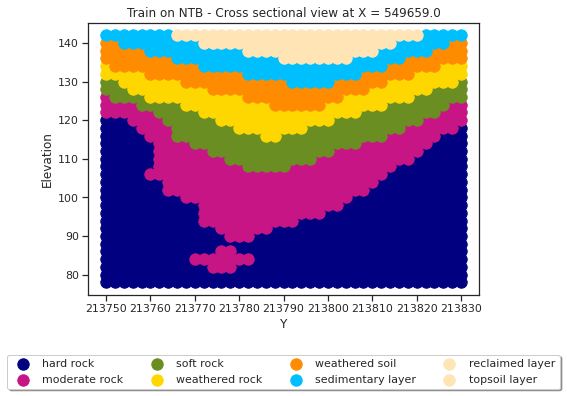

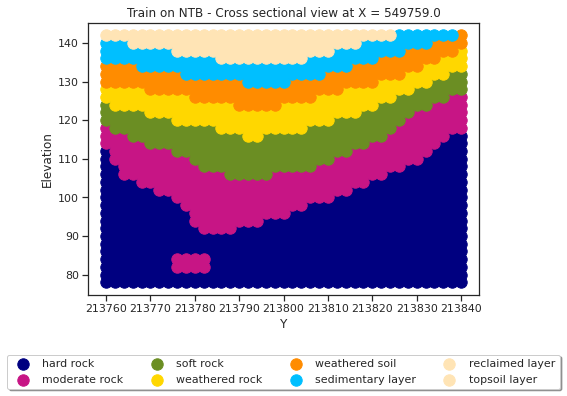

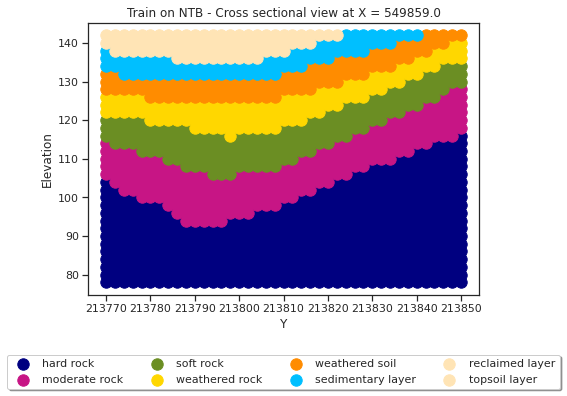

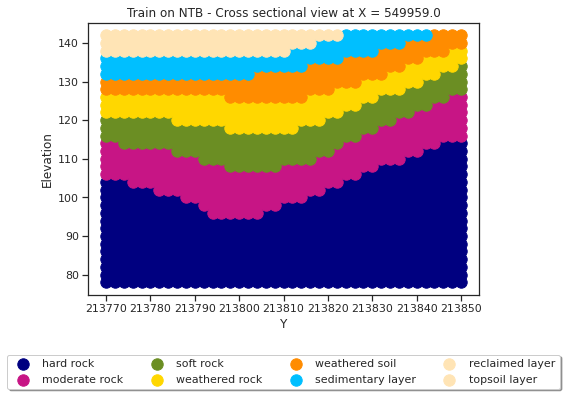

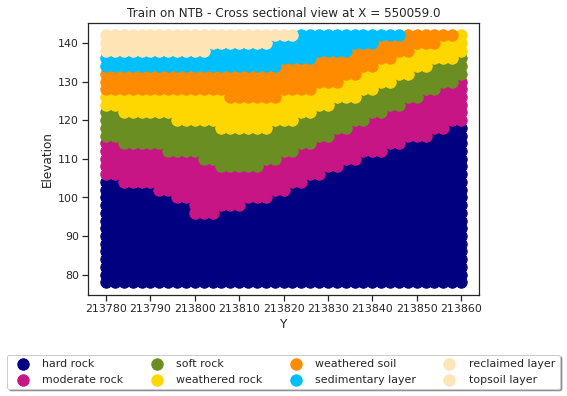

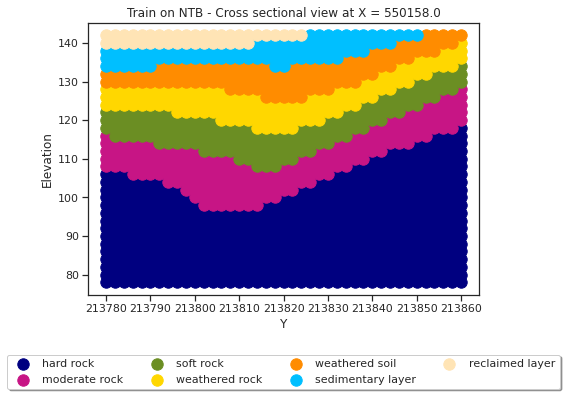

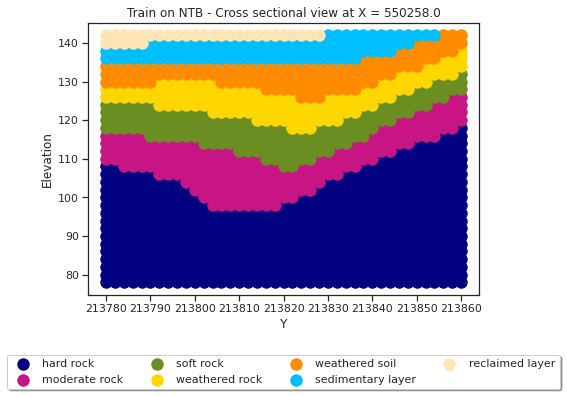

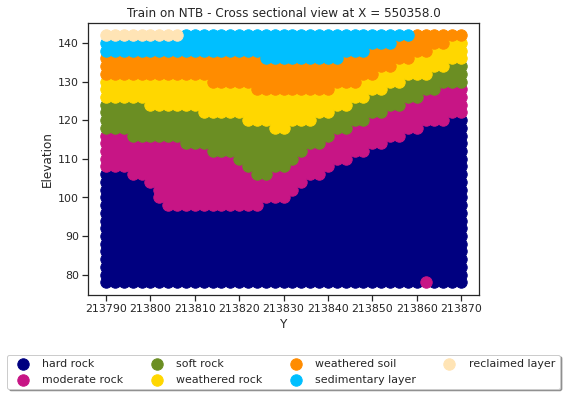

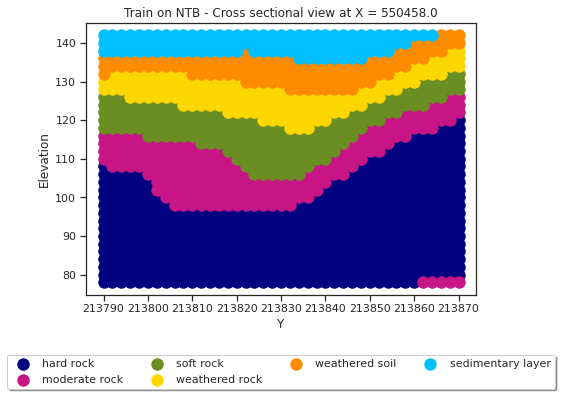

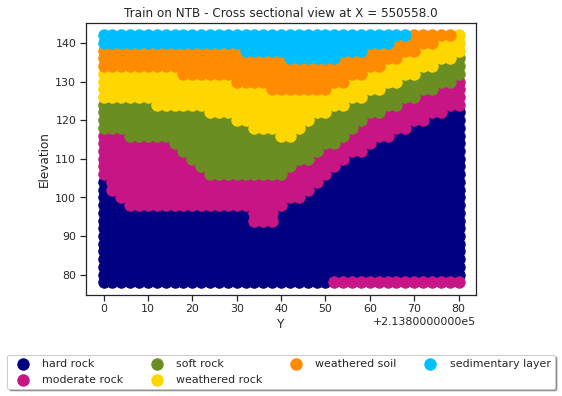

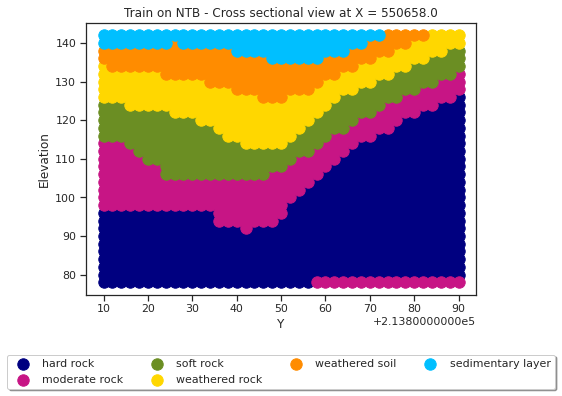

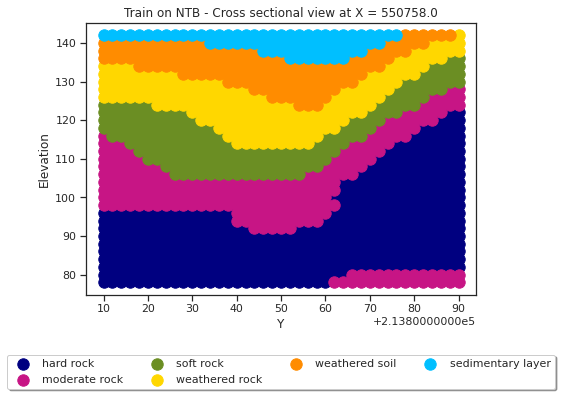

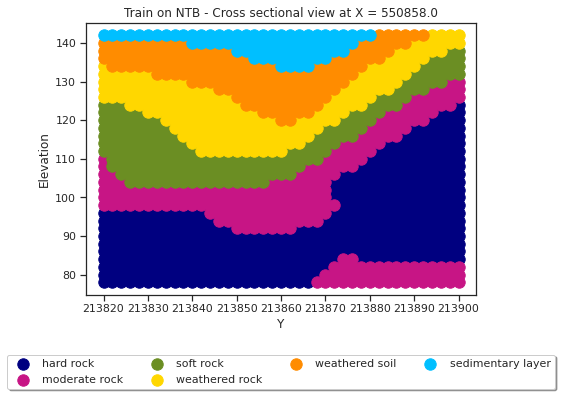

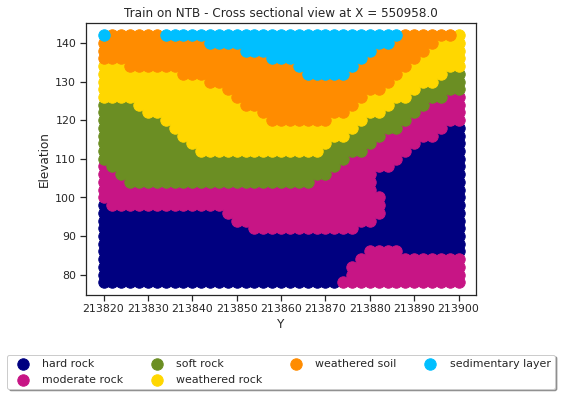

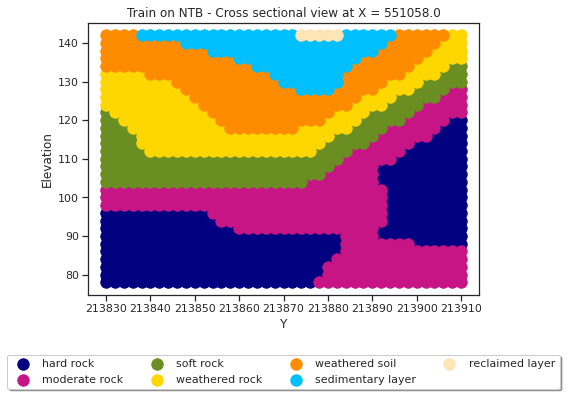

In [17]:
c = 0
for k in range(0,15,1):
    visualize_2_d(X = X[1353*k:1353*(k+1)], Y = soil_type[1353*k:1353*(k+1)], labels = labels, colours=label_colours, 
                  train_on = 'ntb', cross = 'width', x_cross = X[1353*k:1353*(k+1)][0][0])
    plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_sectional_width_{}_train_onNTB_2D.png'.format(x_width[k]), dpi=300)


In [18]:
# plot_full_3D_points(x = X[:40*33+33], y = soil_type[:40*33+33], labels = labels, colours=label_colours, train_on='ntb')

# **Visualize results from model train on merged NTB and TB**

In [31]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/output_results/export_dataframe_train_on_merged_ntb_tb.csv'
data = pd.read_csv(DATA_DIR)

In [32]:
X, soil_type = extract_cross_section(data = data, inquiry_X = False, inquiry_Y= False, inquiry_elevation = False)

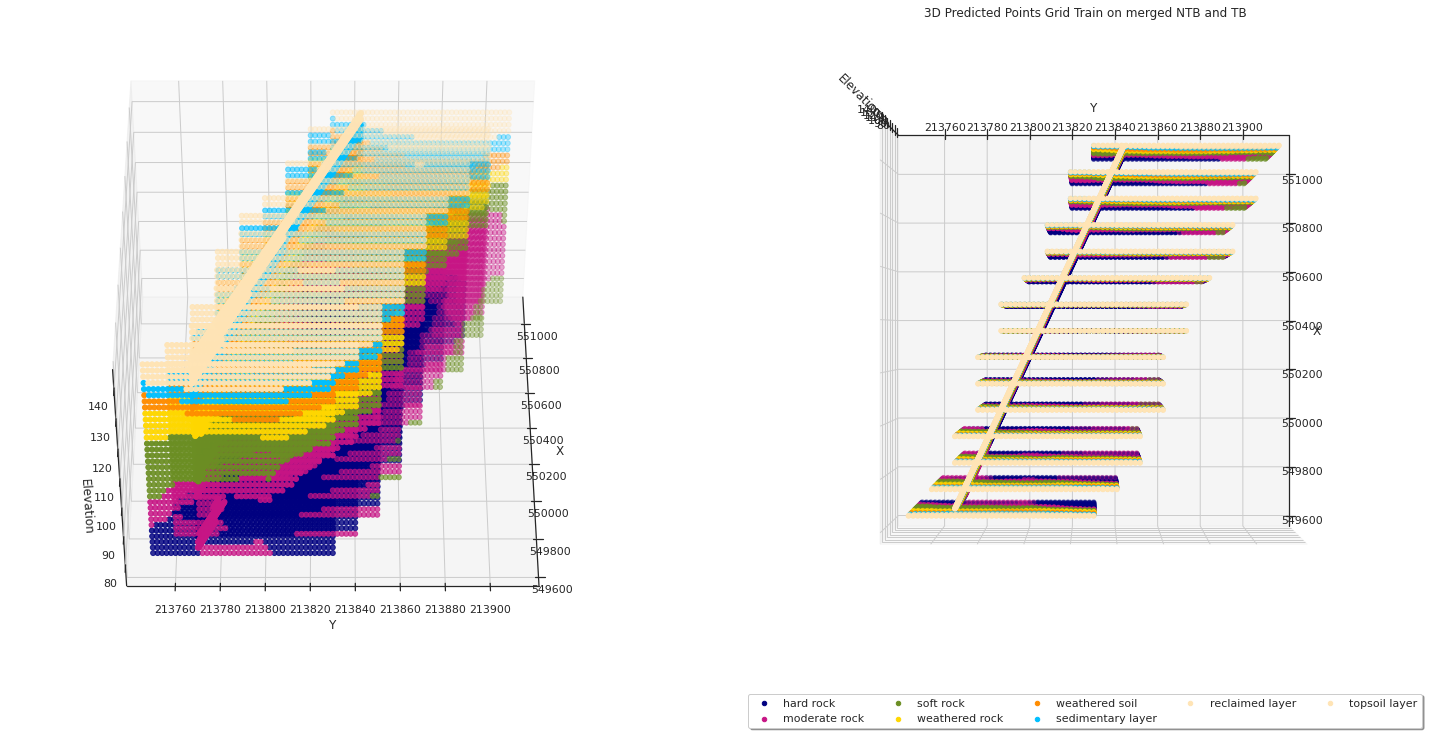

In [33]:
plot_full_3D_points(x = X[:42933], y = soil_type[:42933], labels = labels, colours=label_colours, train_on='ntb-tb')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/3d_points_grid_train_on_NTB_TB.png', dpi=300)

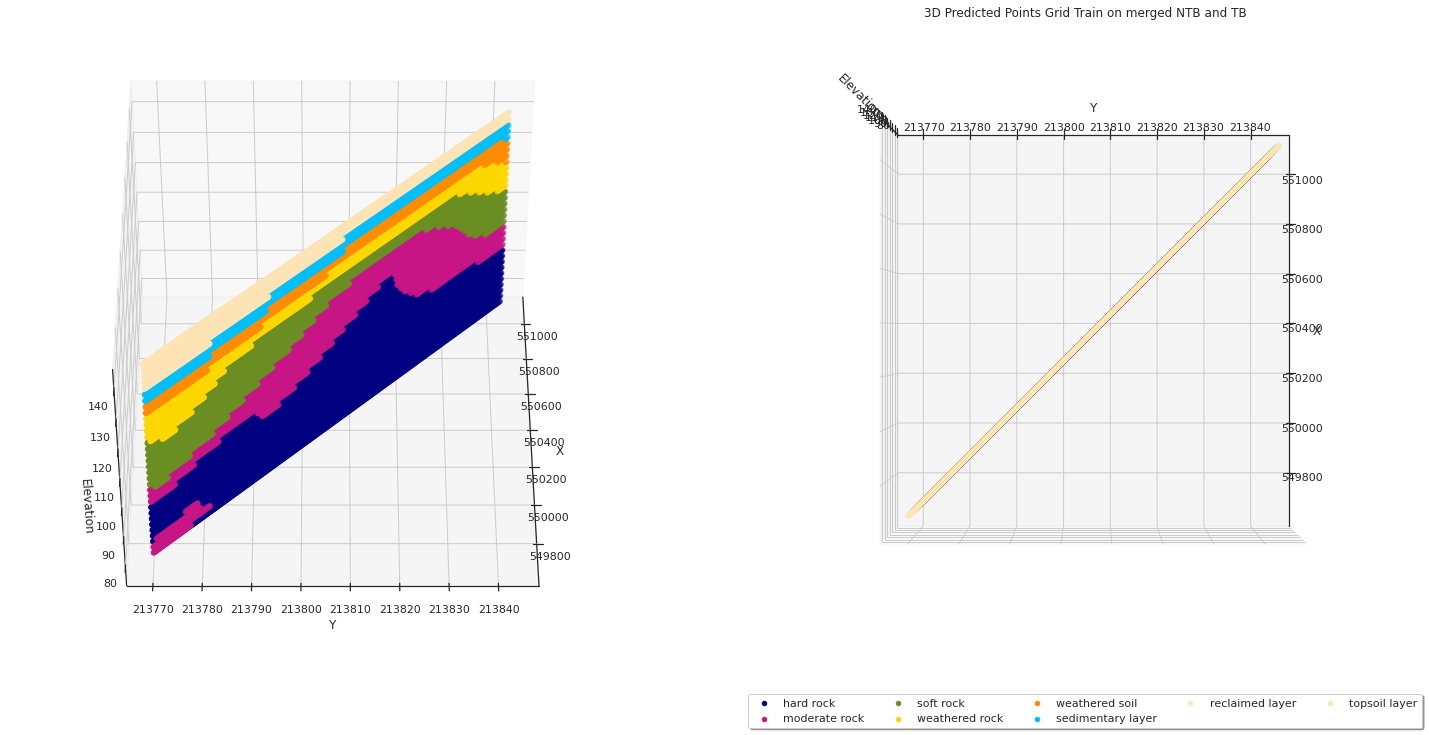

In [34]:
plot_full_3D_points(x = X[20327:42933], y = soil_type[20327:42933], labels = labels, colours=label_colours, train_on='ntb-tb')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_sectional_long_train_onNTBTB.png', dpi=300)

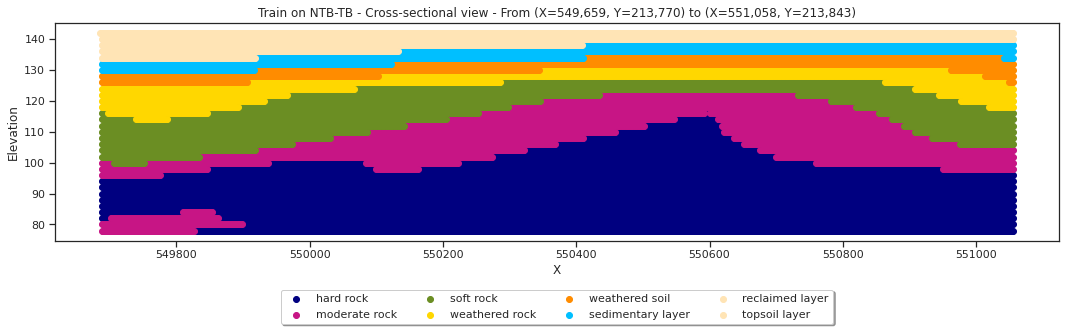

In [23]:
visualize_2_d(X = X[20327:42933], Y = soil_type[20327:42933], labels = labels, colours=label_colours, train_on='ntb-tb')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_sectional_long_train_onNTBTB_2D.png', dpi=300)

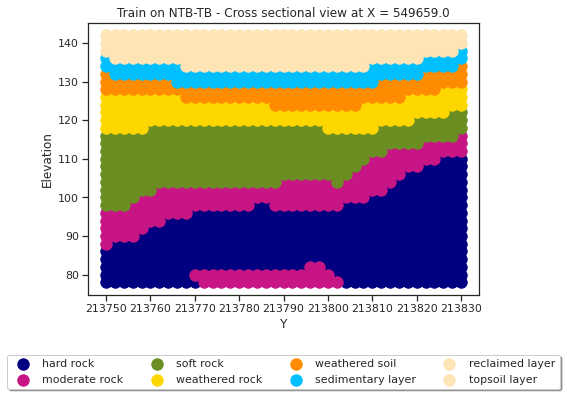

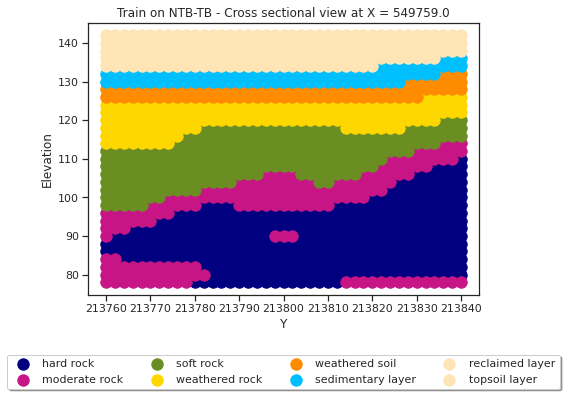

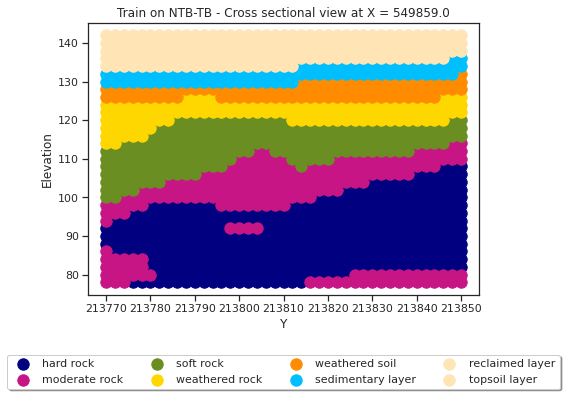

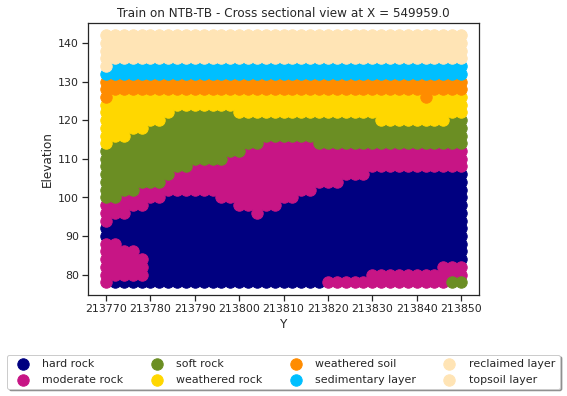

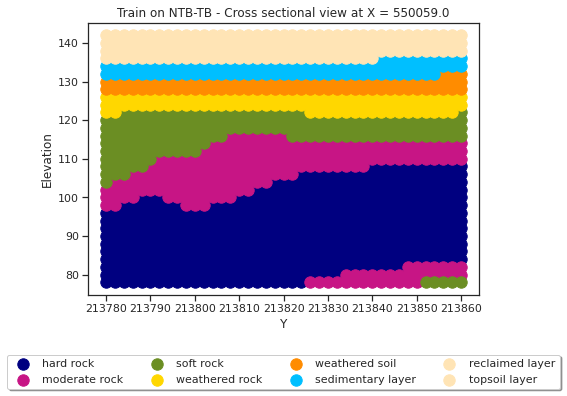

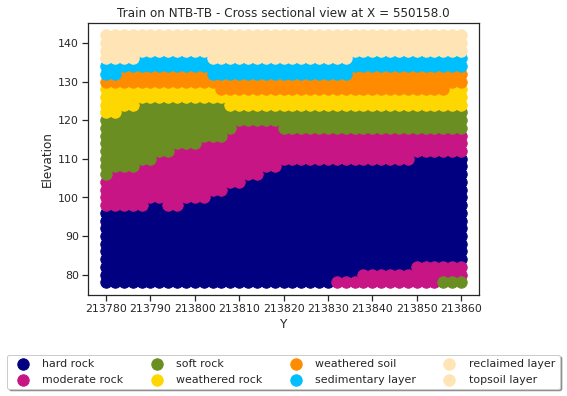

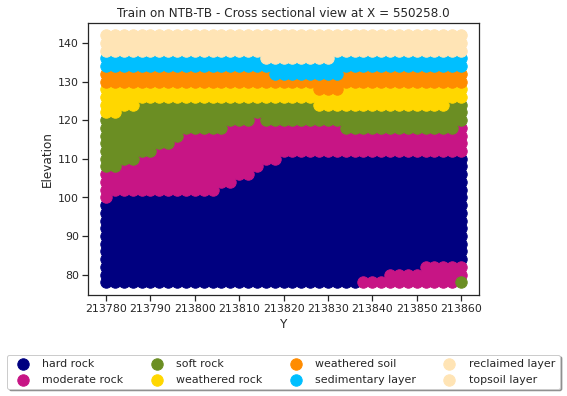

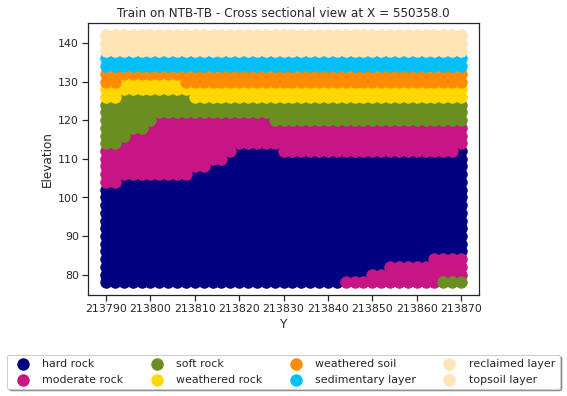

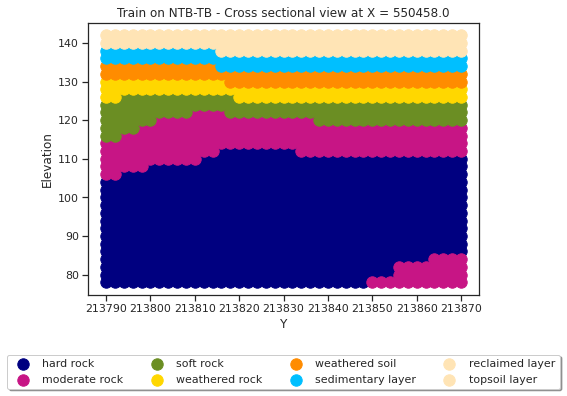

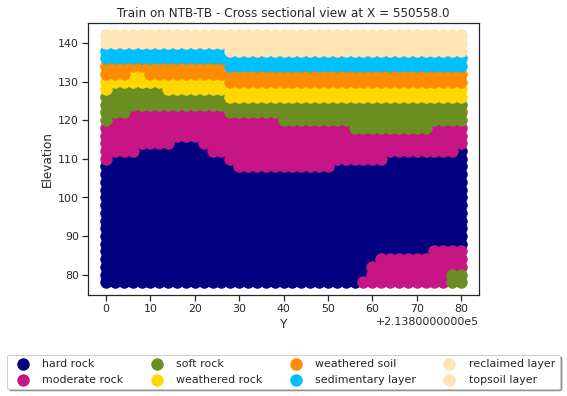

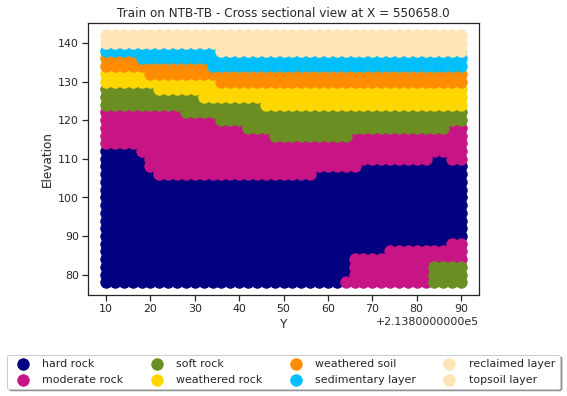

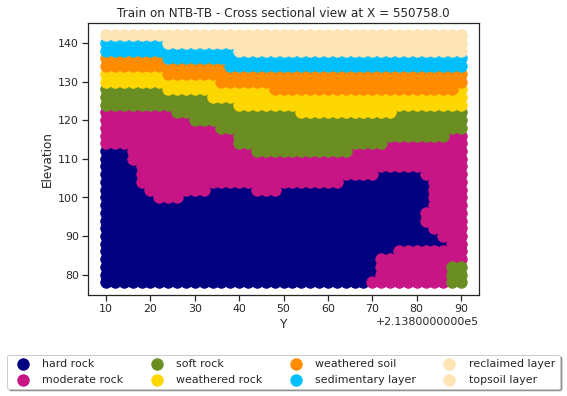

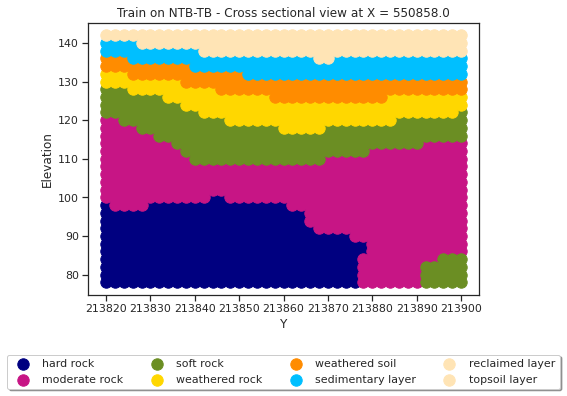

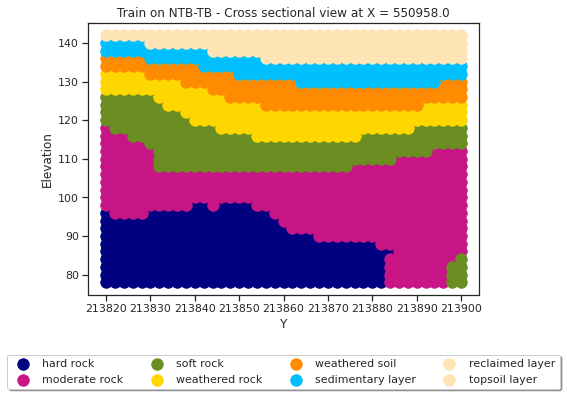

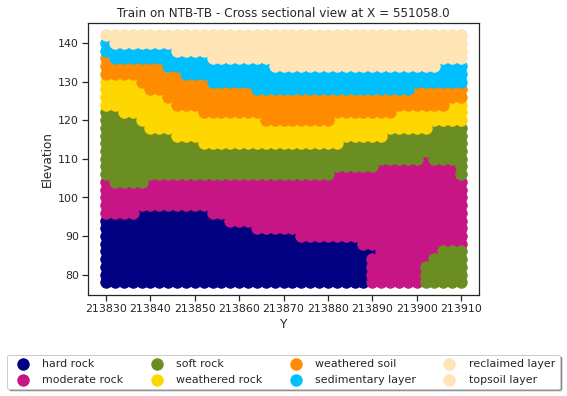

In [24]:
c = 0
for k in range(0,15,1):
    visualize_2_d(X = X[1353*k:1353*(k+1)], Y = soil_type[1353*k:1353*(k+1)], labels = labels, colours=label_colours, 
                  train_on = 'ntb-tb', cross = 'width', x_cross = X[1353*k:1353*(k+1)][0][0])
    plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_sectional_width_{}_train_onNTBTB_2D.png'.format(x_width[k]), dpi=300)


### **Inquiry Y Cross section**

In [25]:
# X_cross_Y, soil_type_cross_Y = extract_cross_section(inquiry_Y = INQUIRY_Y)

In [26]:
# X_cross_Y = X[20000:42613]
# soil_type_cross_Y = soil_type[20000:42613]

In [27]:
# plot_cross_section(X_cross_Y, soil_type_cross_Y, inquiry = 'Y')
# plt.title('Train on NTB and TB - Cross section at Y ')
# # plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_section_Y_ntb_tb.png', dpi=300)


### **Inquiry X Cross section**

In [28]:
# INQUIRY_X = 5.49660000e+05
# X_cross_X, soil_type_cross_X = extract_cross_section(inquiry_X = INQUIRY_X)

In [29]:
# for k in range(1,27,1):
#     INQUIRY_X = 549690 + 3*16*k
#     X_cross_X, soil_type_cross_X = extract_cross_section(inquiry_X = INQUIRY_X)
#     plot_cross_section(X_cross_X, soil_type_cross_X, inquiry = 'X')
#     plt.title('Train on NTB - Cross section at X = {}'.format(INQUIRY_X))
#     plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_section_X_ntb_tb{}.png'.format(INQUIRY_X), dpi=300)

In [30]:
# plot_cross_section(X_cross_X, soil_type_cross_X, inquiry = 'X')
# plt.title('Train on NTB and TB - Cross section at X = {}'.format(INQUIRY_X))
# plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_section_X_ntb_tb.png', dpi=300)